# Prévision d'un crédit logement - Partie 1 - Annalyse des données


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv('train.csv')

In [3]:
data_test= pd.read_csv('test.csv')

In [4]:
df=data_train.copy()

In [5]:
df.shape

(614, 13)

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='None'>

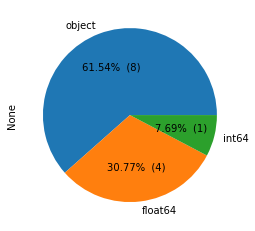

In [9]:
values = df.dtypes.value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

df.dtypes.value_counts().plot.pie(autopct=make_autopct(values))

<AxesSubplot:>

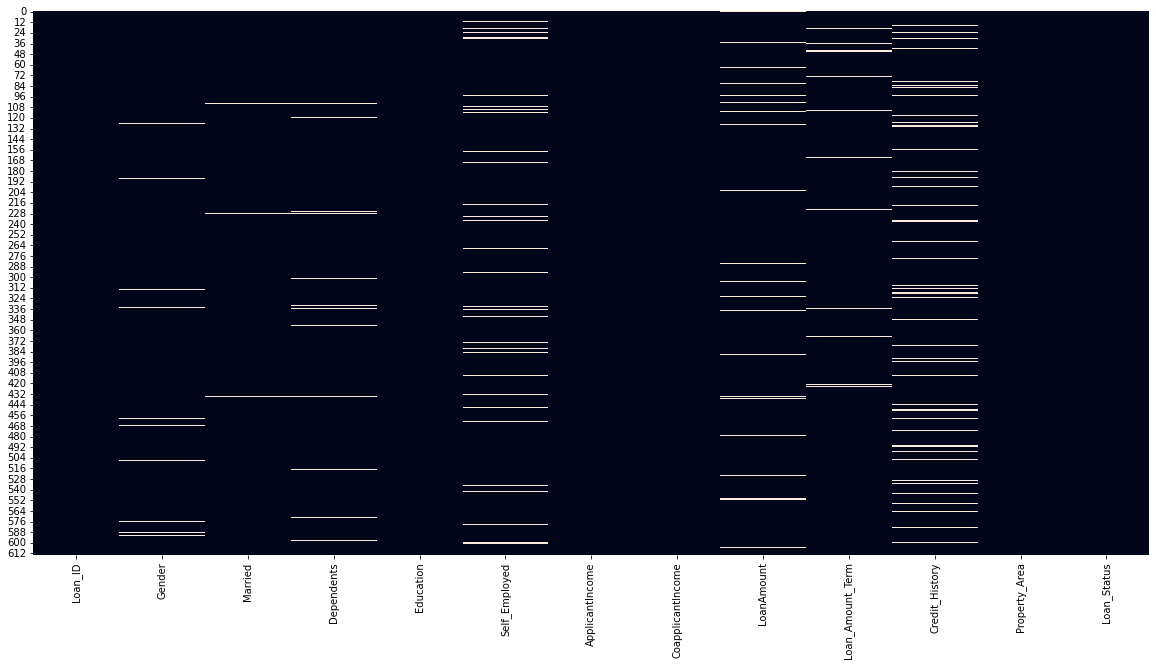

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [11]:
df = df.drop('Loan_ID', axis=1)

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

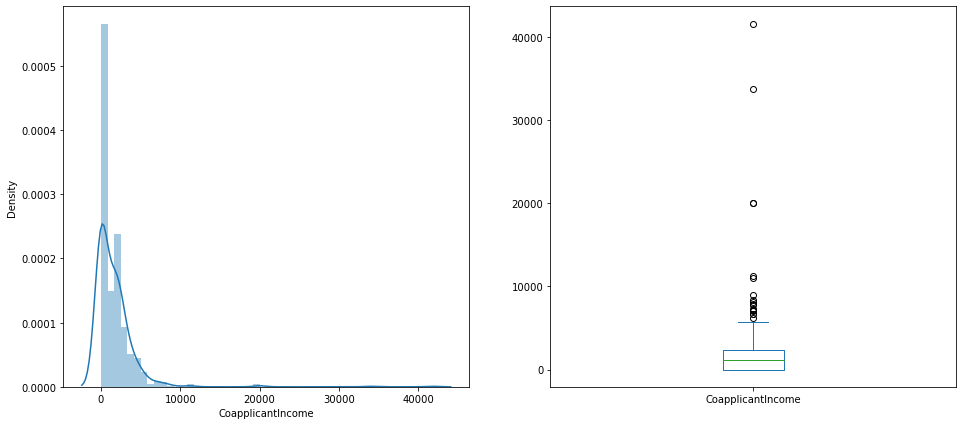

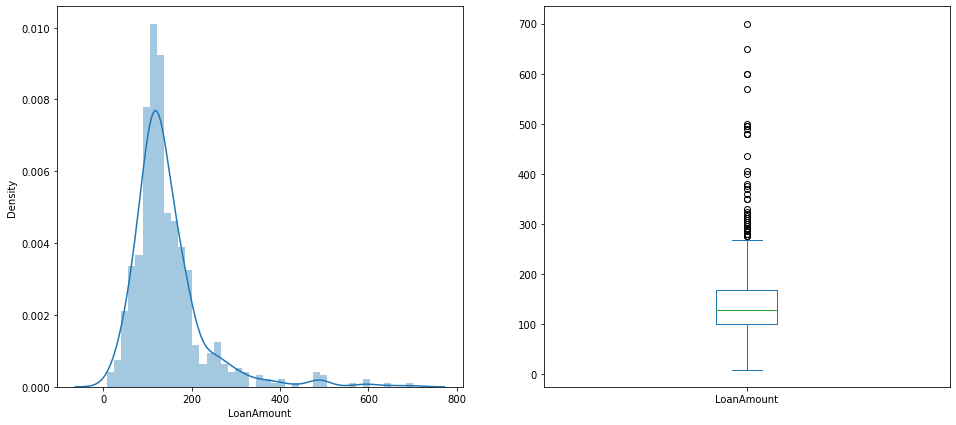

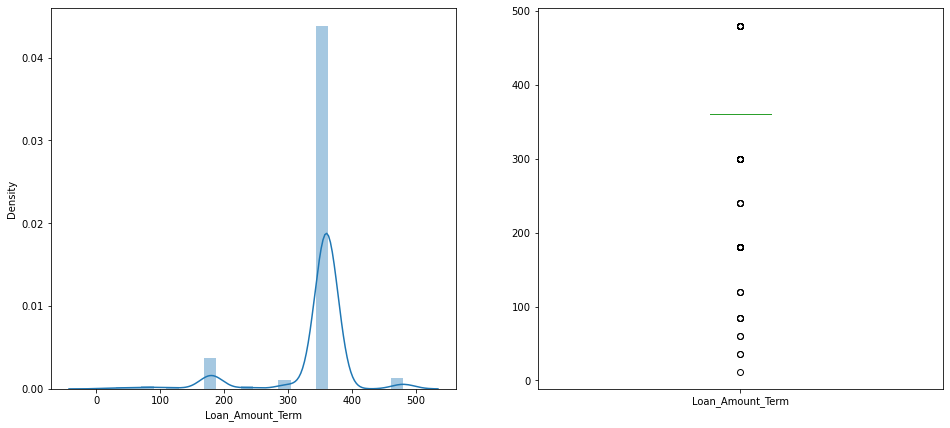

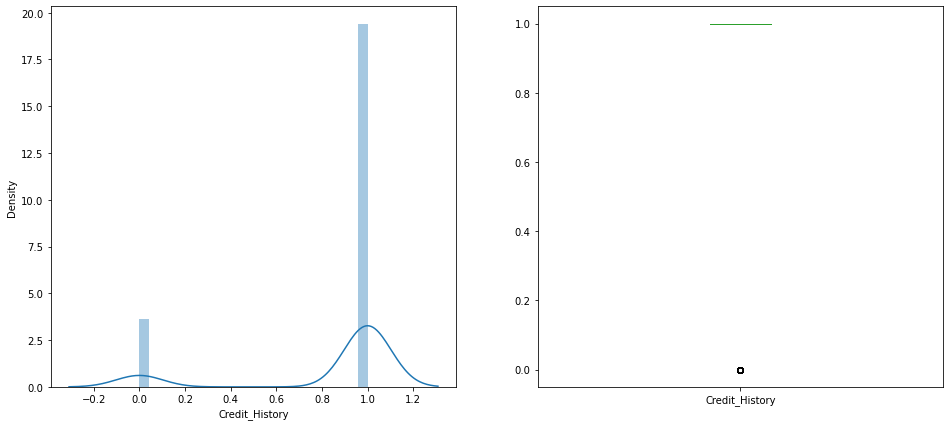

In [14]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    sns.distplot(df[col]);

    plt.subplot(122)
    df[col].plot.box()
    

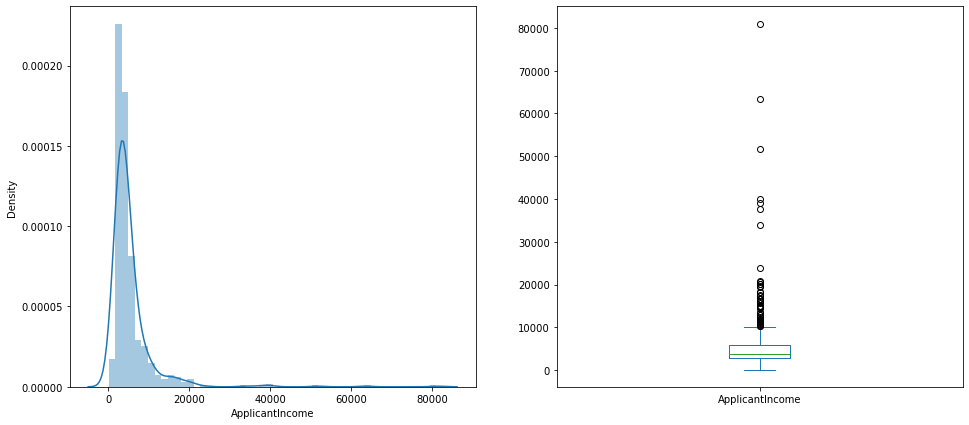

In [15]:
for col in df.select_dtypes('int'):
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    sns.distplot(df[col]);

    plt.subplot(122)
    df[col].plot.box()

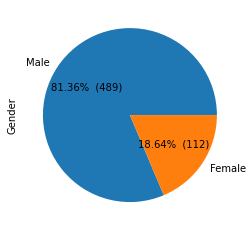

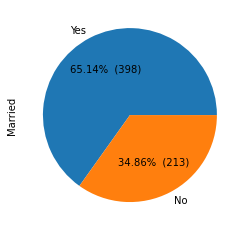

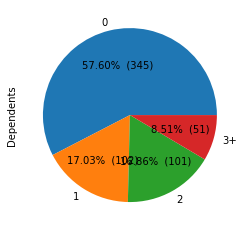

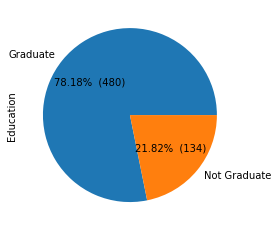

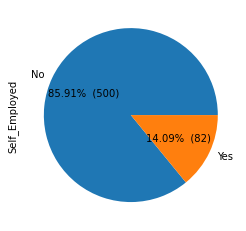

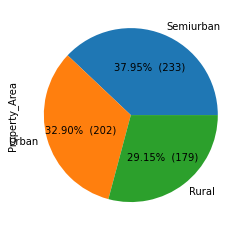

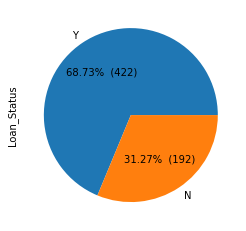

In [16]:
for col in df.select_dtypes('object'):
    plt.figure()
    values = df[col].value_counts()
    df[col].value_counts().plot.pie(autopct=make_autopct(values))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Figure size 432x288 with 0 Axes>

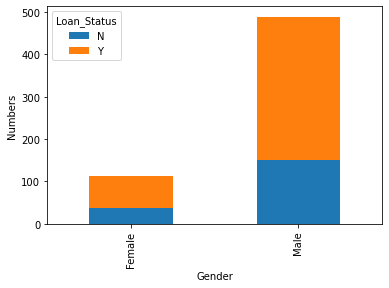

<Figure size 432x288 with 0 Axes>

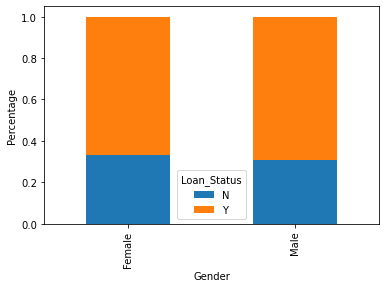

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<Figure size 432x288 with 0 Axes>

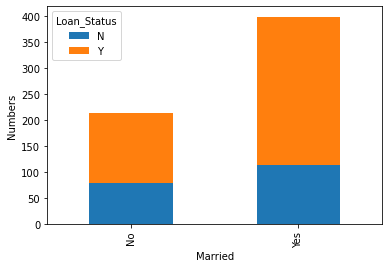

<Figure size 432x288 with 0 Axes>

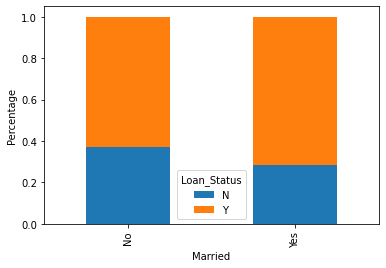

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<Figure size 432x288 with 0 Axes>

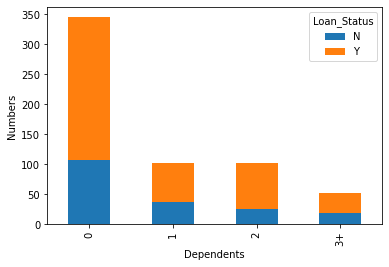

<Figure size 432x288 with 0 Axes>

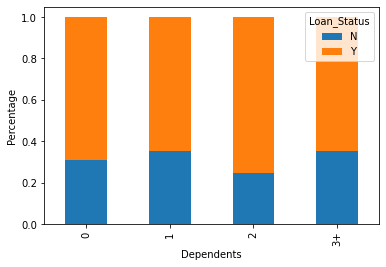

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<Figure size 432x288 with 0 Axes>

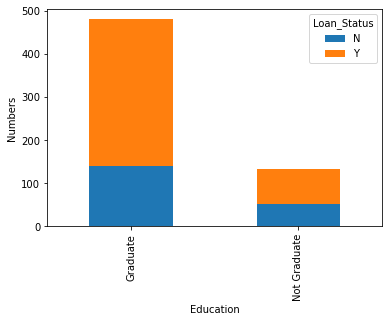

<Figure size 432x288 with 0 Axes>

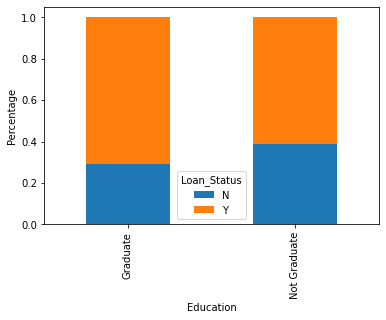

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<Figure size 432x288 with 0 Axes>

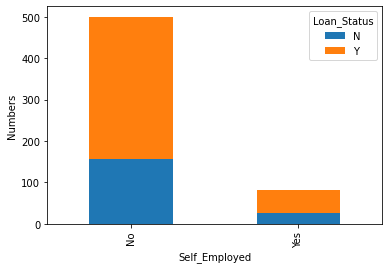

<Figure size 432x288 with 0 Axes>

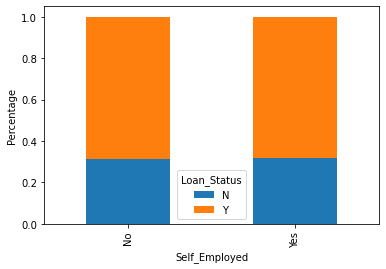

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<Figure size 432x288 with 0 Axes>

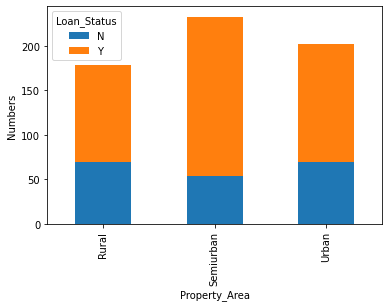

<Figure size 432x288 with 0 Axes>

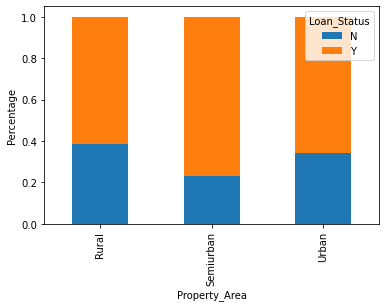

Loan_Status    N    Y
Loan_Status          
N            192    0
Y              0  422


<Figure size 432x288 with 0 Axes>

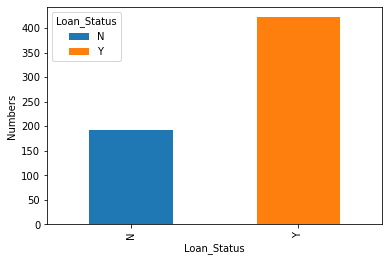

<Figure size 432x288 with 0 Axes>

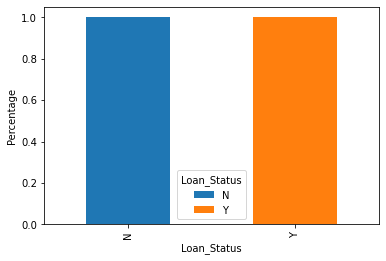

In [17]:
for col in df.select_dtypes('object'):
    print(pd.crosstab(df[col],df["Loan_Status"]))
    plt.figure()
    CrossTab = pd.crosstab(df[col],df["Loan_Status"])
    CrossTab.plot(kind="bar",stacked=True)
    plt.xlabel(col)
    plt.ylabel("Numbers")
    
    plt.figure()
    CrossTabPourcent = CrossTab.div(CrossTab.sum(1).astype(float),axis=0)
    CrossTabPourcent.plot(kind="bar",stacked=True)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.show()
    

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


Text(0, 0.5, 'Percentage')

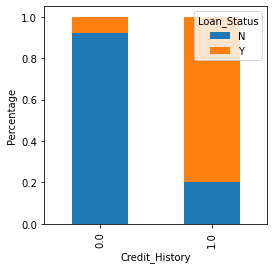

In [18]:
print(pd.crosstab(df["Credit_History"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Credit_History"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")

In [19]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [20]:
df["LoanAmountPerMonth"]=df["LoanAmount"]/df["Loan_Amount_Term"]

In [21]:
df["Balance_Income_Applicant"] = df["ApplicantIncome"]-df["LoanAmountPerMonth"]*1000

In [22]:
df["Balance_Income_Total"] = df["TotalIncome"]-df["LoanAmountPerMonth"]*1000

In [23]:
df['ratio_LoanAmountPerMonth_ApplicantIncome']=df['LoanAmountPerMonth']/df["ApplicantIncome"]

<AxesSubplot:>

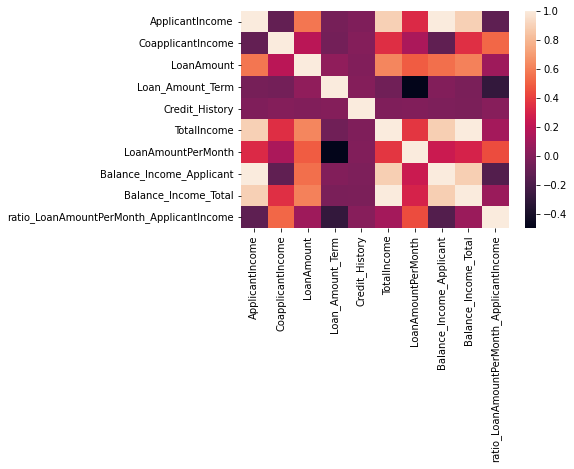

In [24]:
sns.heatmap(df.corr())

In [25]:
for col in df.select_dtypes('object'):
    print(f'{col:-<40} {df[col].unique()}')


Gender---------------------------------- ['Male' 'Female' nan]
Married--------------------------------- ['No' 'Yes' nan]
Dependents------------------------------ ['0' '1' '2' '3+' nan]
Education------------------------------- ['Graduate' 'Not Graduate']
Self_Employed--------------------------- ['No' 'Yes' nan]
Property_Area--------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status----------------------------- ['Y' 'N']


In [26]:
code = {'Male':1,
        'Female':0,
        'No':0,
        'Yes':1,
        '0':0,
        '1':1,
        '2':2,
        '3+':3,
        'Graduate':1,
        'Not Graduate':0,
        'Rural':0,
        'Semiurban':0.5,
        'Urban':1,
        'Y':1,
        'N':0,
        }
    
for col in df.select_dtypes('object').columns:
    df[col] = df[col].map(code)
        
        


<AxesSubplot:>

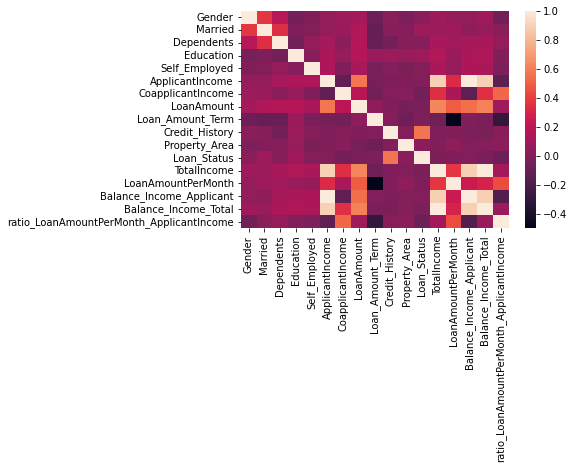

In [27]:
sns.heatmap(df.corr())

In [28]:
df2=df
df2["ApplicantIncome"][df["ApplicantIncome"]>20000]=20000
df2["CoapplicantIncome"][df["CoapplicantIncome"]>10000]=10000

In [29]:
index=0
index_loc=[]
for i in df2["LoanAmount"]:
    
    if (i>420):
        index_loc.append(index)
        print(i,index)
    index=index+1
        
    




650.0 130
600.0 155
700.0 171
495.0 177
436.0 278
480.0 308
490.0 333
570.0 369
500.0 487
480.0 506
480.0 523
600.0 561
496.0 604


In [30]:
index_loc


[130, 155, 171, 177, 278, 308, 333, 369, 487, 506, 523, 561, 604]

In [31]:
df2=df2.drop(index_loc, axis=0)

<AxesSubplot:>

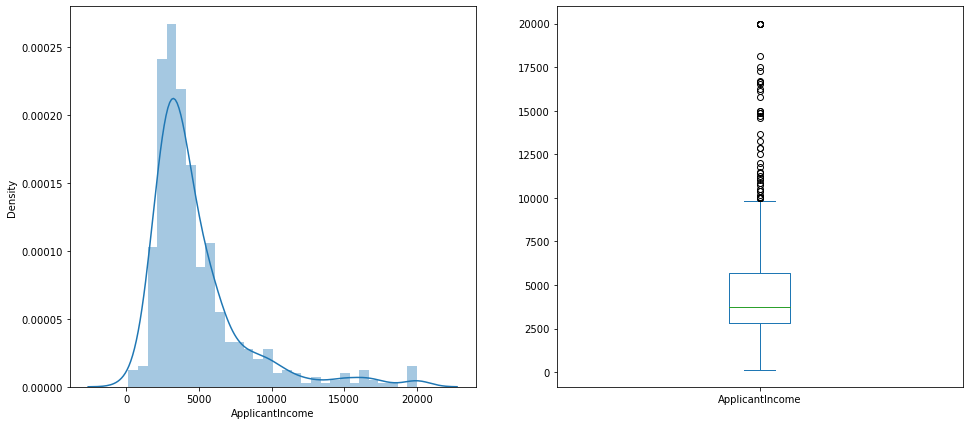

In [32]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.distplot(df2["ApplicantIncome"]);

plt.subplot(122)
df2["ApplicantIncome"].plot.box()

<AxesSubplot:>

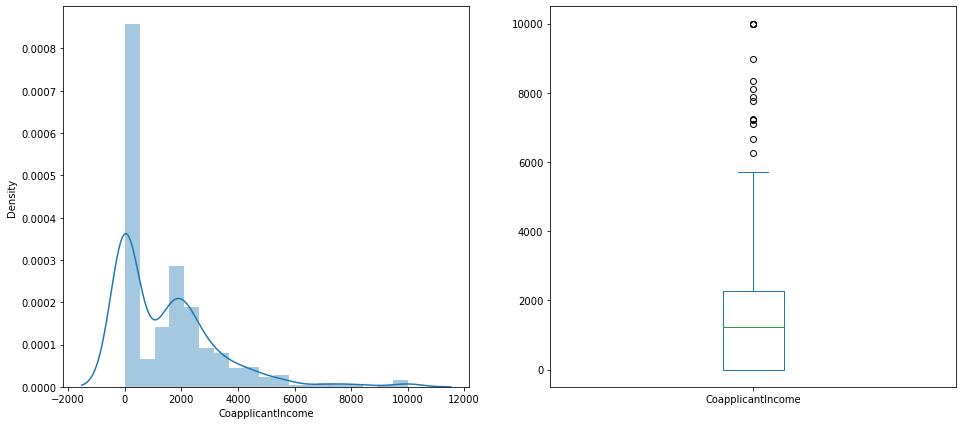

In [33]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.distplot(df2["CoapplicantIncome"]);

plt.subplot(122)
df2["CoapplicantIncome"].plot.box()

<AxesSubplot:>

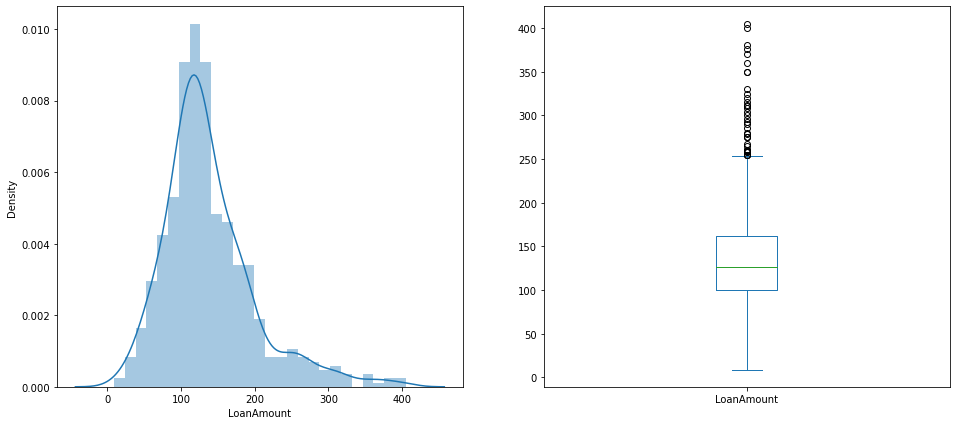

In [34]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.distplot(df2["LoanAmount"]);

plt.subplot(122)
df2["LoanAmount"].plot.box()